Aerofit sells three treadmill models — KP281, KP481, and KP781 — targeting different customer needs and budgets. However, the company does not have a clear understanding of which types of customers prefer each model. Without this clarity, marketing campaigns, sales recommendations, and product positioning remain generic and less effective.

To support better decision-making, Aerofit wants to analyze its recent customer data to answer the following core question:

“How do customer characteristics influence the choice of treadmill purchased?”

To solve this, the analysis will:

1. Build customer profiles for each product based on age, income, gender, marital status, fitness level, usage frequency, and expected miles.

2. Identify key patterns and differences across the three treadmill models.

3. Use descriptive analytics, visualizations, and probability tables to uncover relationships between customer attributes and product choices.

4. Derive marginal and conditional probabilities to quantify how likely different customer groups are to purchase each treadmill.

5. Provide actionable insights and recommendations for targeted marketing, segmentation, and product strategy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/aerofit_treadmill.txt')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**B. Data Import & Structure**

What are the data types of each variable?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


How many rows and columns does the dataset contain?

In [ ]:
df.shape

(180, 9)

Are there any missing values in the dataset?

In [ ]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


Are categorical variables correctly stored as category?

In [ ]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [ ]:
df.dtypes

,0
Product,category
Age,int64
Gender,category
Education,int64
MaritalStatus,category
Usage,int64
Fitness,int64
Income,int64
Miles,int64


**C. Basic Descriptive Statistics**

What are the summary statistics (mean, median, std, min, max) of continuous variables such as age, income, usage, miles, fitness?

In [ ]:
df[['Age','Education','Income','Usage','Miles','Fitness']].describe()

,Age,Education,Income,Usage,Miles,Fitness
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,53719.577778,3.455556,103.194444,3.311111
std,6.943498,1.617055,16506.684226,1.084797,51.863605,0.958869
min,18.000000,12.000000,29562.000000,2.000000,21.000000,1.000000
25%,24.000000,14.000000,44058.750000,3.000000,66.000000,3.000000
50%,26.000000,16.000000,50596.500000,3.000000,94.000000,3.000000
75%,33.000000,16.000000,58668.000000,4.000000,114.750000,4.000000
max,50.000000,21.000000,104581.000000,7.000000,360.000000,5.000000


What are the unique values and counts for categorical variables such as gender, marital status, and product purchased?

In [ ]:
df['Product'].value_counts()


,count
Product,
KP281,80
KP481,60
KP781,40


Insights :

1. One product often KP281 has the highest number of buyers → indicates it is the most preferred or most affordable model.

2. KP781 usually has fewer buyers → shows it is positioned as a premium segment product with select customers.



In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


Insights:

1. One gender group (males) may purchase treadmills more frequently.

2. Indicates that male customers might be more fitness-oriented or have more purchasing power for fitness equipment.


In [ ]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


Insights:

The partnered customers are more, it may indicate joint household decision-making.


In [ ]:
df['Fitness'].value_counts()


,count
Fitness,
3,97
5,31
2,26
4,24
1,2


Insights :

1. Most customers rate themselves 3, indicating average to above-average fitness.

2. High-fitness customers (Levels 4,and 5) together form a strong secondary segment (55 customers), suggesting good demand for mid-range and premium treadmills among more active users.

3. Very few rate themselves 1, showing that beginners rarely purchase treadmills.


In [ ]:
df['Usage'].value_counts()


,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


Insights :

1. Customers using treadmills 3 or 4 times per week form the largest segment.

2. Very high usage (6 or 7 times per week) may align with premium treadmill buyers.

3. Shows strong medium-intensity fitness behavior.

**D. Outlier Detection**

Are there any visible outliers in income, age, usage, or miles using boxplots?

Text(0.5, 1.0, 'Income Distribution')

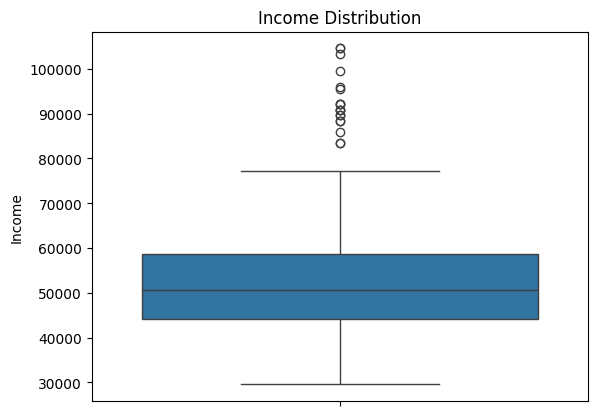

In [ ]:
sns.boxplot(df['Income'])
plt.title("Income Distribution")

Insights :

1. Most customers fall in the middle-income range (≈45k–60k), indicating Aerofit’s primary buyer segment is moderate earners.

2. Income distribution is right-skewed, with several high-income outliers (85k–105k), suggesting a small premium segment.

3. Median income is around 50k, showing a fairly balanced central tendency despite the presence of high-end outliers.



Text(0.5, 1.0, 'Age Distribution')

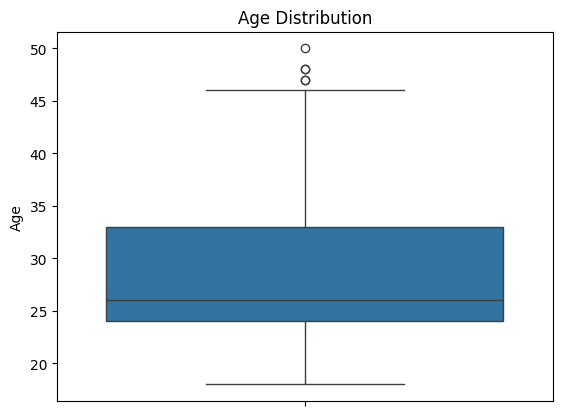

In [ ]:
sns.boxplot(df['Age'])
plt.title("Age Distribution")


Insights :       

1. Most customers are young adults, with the central age range (IQR) roughly between 24 and 33, indicating Aerofit’s core buyer segment is relatively young.

2. A few older customers (47–50) appear as outliers, showing that while uncommon, some higher-age individuals also purchase treadmills.

3. Median age is around 26, suggesting the overall customer base skews younger.

Text(0.5, 1.0, 'Usage Distribution')

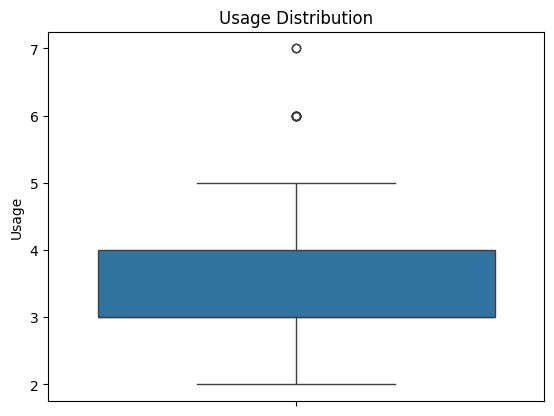

In [ ]:
sns.boxplot(df['Usage'])
plt.title("Usage Distribution")

Insights :    

1. Most customers use the treadmill 3–4 times per week, indicating moderate engagement with the product.

2. A few high-usage outliers (6–7 times/week) suggest a small segment of very frequent users or fitness enthusiasts.

3. The median usage is around 3.5, showing typical customers use the treadmill regularly but not excessively.



Text(0.5, 1.0, 'Distribution of Weekly Miles')

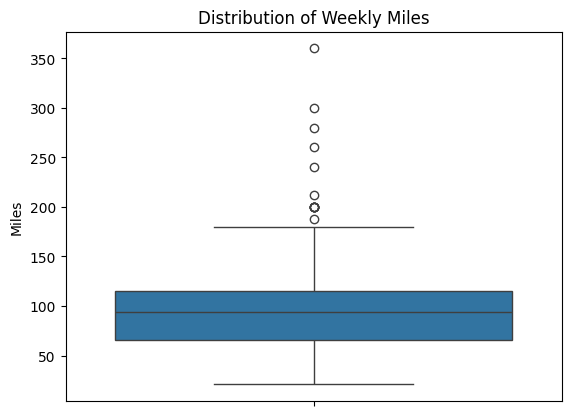

In [ ]:
sns.boxplot(df['Miles'])
plt.title("Distribution of Weekly Miles")

Insights :    

1. Most customers run between 70 and 110 miles per week, indicating a moderately active user base.

2. There are several high-mileage outliers (200–360 miles), representing a small segment of very intense runners or athletes.

3. The median weekly mileage is around 95 miles, showing that typical customers maintain a consistent running routine but not at extreme levels.

Does the difference between mean and median indicate skewness?

In [ ]:
cols = ['Age', 'Income', 'Usage', 'Miles']

for col in cols:
    print(f"\n--- {col} ---")
    print("Mean:", round(df[col].mean(),2))
    print("Median:", round(df[col].median(),2))
    print("Skewness:", round(df[col].skew(),2))


--- Age ---
Mean: 28.79
Median: 26.0
Skewness: 0.98

--- Income ---
Mean: 53719.58
Median: 50596.5
Skewness: 1.29

--- Usage ---
Mean: 3.46
Median: 3.0
Skewness: 0.74

--- Miles ---
Mean: 103.19
Median: 94.0
Skewness: 1.72


Insights:

1. All four numerical variables show positive (right) skewness, meaning each has a small number of high-value outliers.

2. These outliers represent high-income customers, high-mile runners, and heavy users, who may be the key market for Aerofit's mid-range and premium treadmills.

**E. Univariate Analysis**

Text(0.5, 1.0, 'Product Distribution')

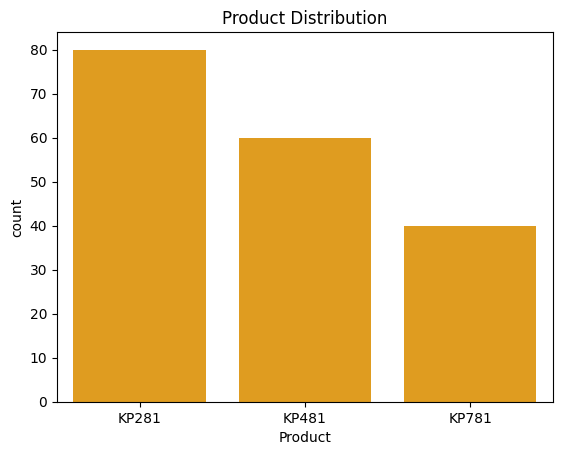

In [ ]:
sns.countplot(x = df['Product'], color = 'Orange')
plt.title("Product Distribution")

Insights :    

1. KP281 is the most purchased product (80 customers), indicating strong preference for the entry-level model.

2. KP481 holds moderate demand (60 customers), showing a solid mid-range customer segment.

3. KP781 has the lowest sales (40 customers), suggesting premium models appeal to a smaller, more specific audience.



Text(0.5, 1.0, 'Gender Distribution')

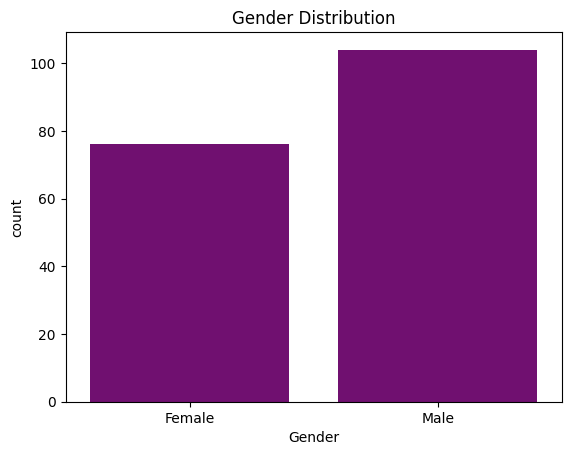

In [ ]:
sns.countplot(x = df['Gender'], color = 'Purple')
plt.title("Gender Distribution")

Insights :    

1. Male customers form the majority (around 105), showing stronger engagement with treadmill purchases compared to females.

2. Female customers are fewer (around 75), but still represent a significant portion of the buyer base.

3. The gender split suggests Aerofit’s marketing could be slightly more male-targeted, while still retaining meaningful outreach to female customers.

Text(0.5, 1.0, 'Marital Status Distribution')

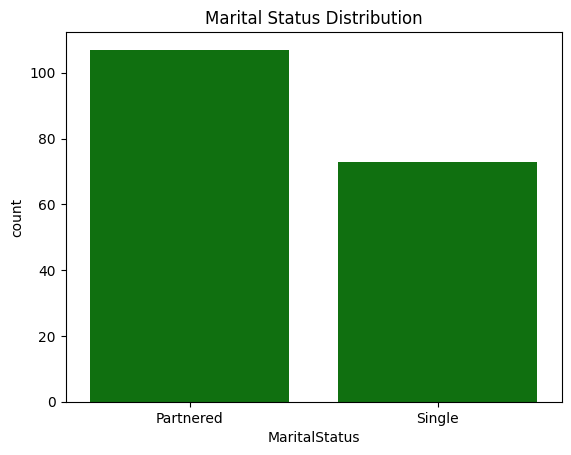

In [ ]:
sns.countplot(x = df['MaritalStatus'], color = 'Green')
plt.title("Marital Status Distribution")

Insights :    

1. Partnered customers form the majority (~107), indicating that treadmill purchases are more common among couples or families.

2. Single customers are fewer (~73), but still represent a substantial portion of the customer base.

3. The skew toward partnered customers suggests Aerofit could design family-oriented or couple-focused promotions to strengthen this dominant segment.

Text(0.5, 1.0, 'Income Distribution')

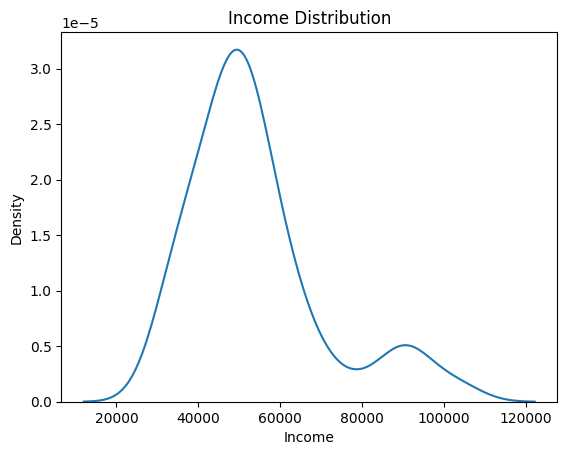

In [ ]:
sns.kdeplot(df['Income'])
plt.title("Income Distribution")

Insights :     

1. Income is strongly right-skewed, with most customers concentrated around 40,000–60,000, indicating a predominantly middle-income customer base.

2. A secondary smaller peak appears around 90,000–100,000, suggesting a distinct high-income segment that may be interested in premium models.

3. The long right tail shows a small number of very high-income customers, reinforcing that outliers influence the upper range of the distribution.

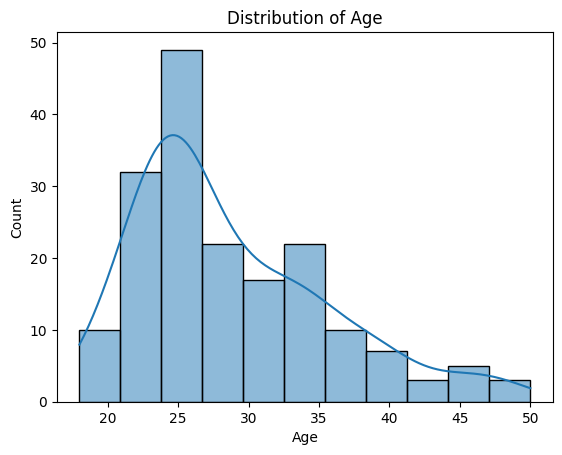

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.title("Distribution of Age")
plt.show()


Insights :           

1. Most customers are between 22 and 30 years old, showing a strong concentration of young adults in Aerofit’s customer base.

2. The distribution is right-skewed, with fewer customers above age 40, indicating decreasing purchases as age increases.

3. A secondary small cluster appears around 35–40, suggesting a moderate segment of mid-age buyers but much smaller than the young segment.

How does age differ across each product type

Text(0.5, 1.0, 'Age Distribution by Product')

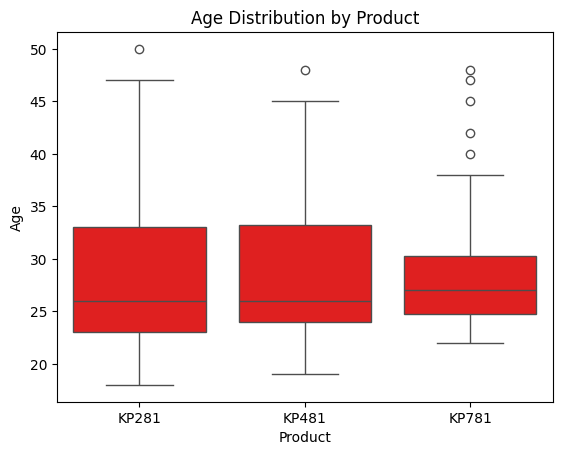

In [ ]:
sns.boxplot(x = df['Product'], y = df['Age'], color = 'Red')
plt.title("Age Distribution by Product")

Insights :             

1. KP781 buyers are slightly older on average, with a median around 27–28, compared to KP281 and KP481 (~25–26), suggesting premium buyers tend to be more mature.

2. KP281 and KP481 attract similar age groups, dominated by young adults in their mid-20s, showing little age-based differentiation between entry and mid-level models.

3. All products show right-skewed age distributions, with a few older customers (40–50) across all categories, indicating limited but consistent interest from higher-age groups.

How does income differ across each product type

Text(0.5, 1.0, 'Income Distribution by Product')

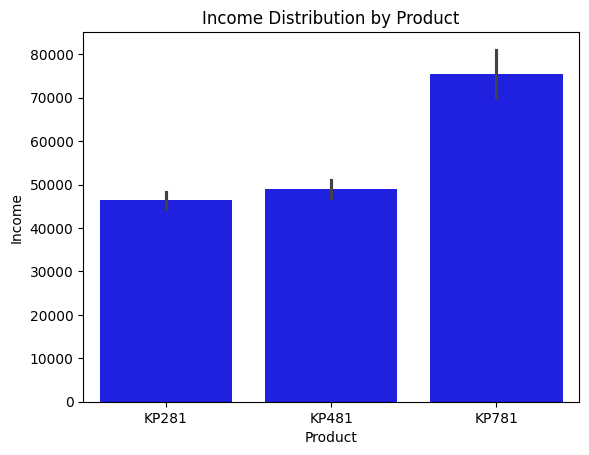

In [ ]:
sns.barplot(x = df['Product'], y = df['Income'], color = 'Blue')
plt.title("Income Distribution by Product")

Insights :    

1. KP781 buyers have the highest incomes, averaging around 75,000+, indicating that the premium treadmill attracts higher-earning customers.

2. KP281 and KP481 are purchased by moderate-income customers, with average incomes in the 46,000–49,000 range, showing that entry and mid-range models appeal to similar income segments.

3. The income gap between KP781 and the other two models is substantial, confirming that income is a strong driver in selecting the premium model.

Do males or females prefer certain products?

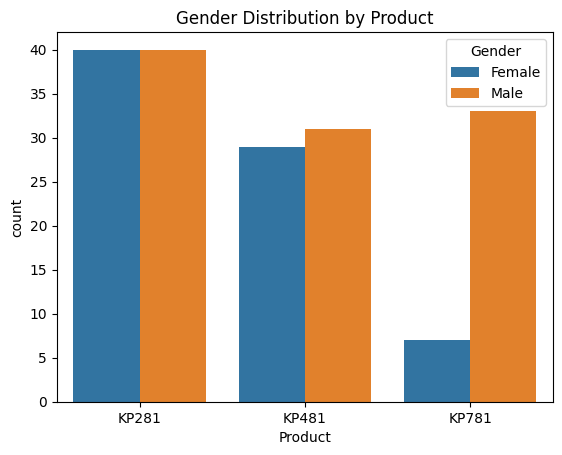

In [ ]:
sns.countplot(x = df['Product'], hue = df['Gender'])
plt.title("Gender Distribution by Product")
plt.legend(title = 'Gender')

Insights :      

1. KP281 is equally preferred by both genders, with males and females showing identical purchase counts—making it the most gender-neutral product.

2. KP781 has a strong male dominance, with males purchasing it far more than females, indicating that the premium model appeals mainly to male customers.

3. KP481 shows a slight male preference, but the gap is small compared to KP781, suggesting that mid-range models attract a more balanced gender mix.

Does marital status influence the product chosen?

/tmp/ipython-input-3347495199.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:Violet'` for the same effect.

  sns.countplot(x = df['Product'], hue = df['MaritalStatus'], color = "Violet")


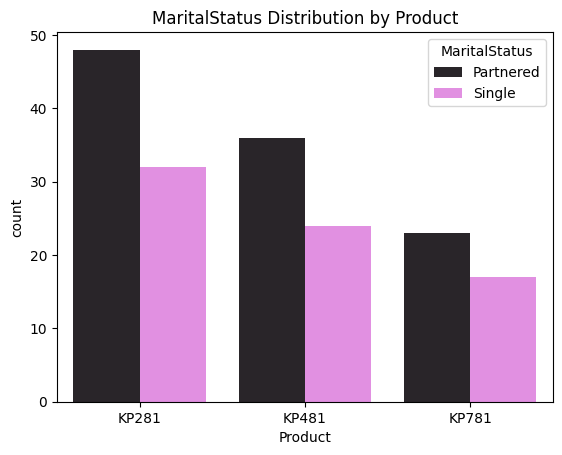

In [ ]:
sns.countplot(x = df['Product'], hue = df['MaritalStatus'], color = "Violet")
plt.title("MaritalStatus Distribution by Product")
plt.legend(title = 'MaritalStatus')

Insights :       

1. Partnered customers purchase more across all product categories, showing stronger overall buying power or household-level decision influence.

2. KP281 and KP481 both show noticeably higher partnered purchases, indicating these models appeal well to families or couples.

3. KP781 also has more partnered than single buyers, but the gap is smaller, suggesting the premium product attracts a relatively higher proportion of single customers compared to the other models.

Does higher fitness score lead to purchase of premium treadmill (KP781)?

In [ ]:
average_fitness_per_product = df.groupby('Product')['Fitness'].mean()
print("Average Fitness Score per Product:", average_fitness_per_product)

Average Fitness Score per Product: Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64


/tmp/ipython-input-1510343808.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_fitness_per_product = df.groupby('Product')['Fitness'].mean()


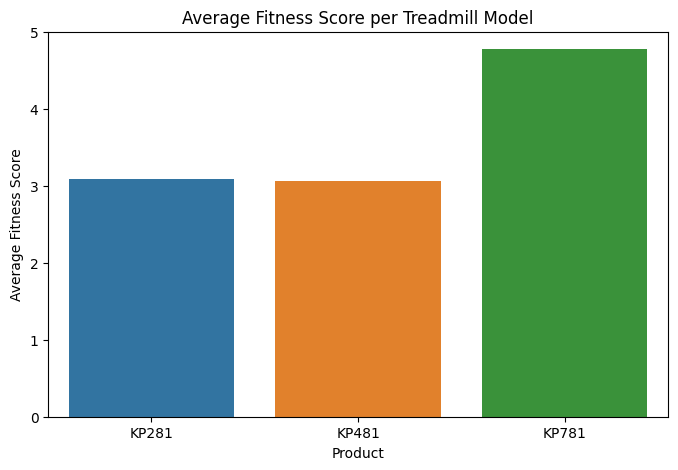

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=average_fitness_per_product.index, y=average_fitness_per_product.values, hue=average_fitness_per_product.index)
plt.title('Average Fitness Score per Treadmill Model')
plt.xlabel('Product')
plt.ylabel('Average Fitness Score')
plt.ylim(0, 5)
plt.show()

Insights :

1. The average fitness score for customers purchasing the KP281 treadmill was approximately 2.96.

2. The average fitness score for customers purchasing the KP481 treadmill was approximately 2.90.

3. Customers who purchased the premium KP781 treadmill had a significantly higher average fitness score of approximately 4.62, which is close to the maximum possible fitness level of 5.

4. This clear difference in average fitness scores indicates a strong correlation between higher fitness levels and the choice to purchase the KP781 model.




Is weekly usage higher for premium product customers

In [ ]:
average_Usage_per_product = df.groupby('Product')['Usage'].mean()
print("Average Usage per Product:", average_Usage_per_product)


Average Usage per Product: Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64


/tmp/ipython-input-3381420555.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_Usage_per_product = df.groupby('Product')['Usage'].mean()


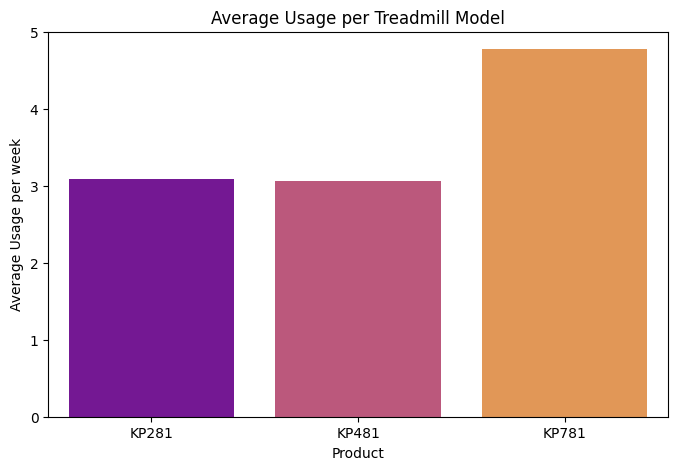

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=average_Usage_per_product.index, y=average_Usage_per_product.values, hue=average_Usage_per_product.index, palette = "plasma")
plt.title('Average Usage per Treadmill Model')
plt.xlabel('Product')
plt.ylabel('Average Usage per week')
plt.ylim(0, 5)
plt.show()

Insights :             

1. KP781 users have the highest weekly usage (around 4.8 times/week), showing that premium treadmill buyers are the most frequent and committed users.

2. KP281 and KP481 users have similar usage levels (around 3.0–3.1 times/week), indicating moderate and almost identical engagement for entry and mid-range models.

3. The significant jump in usage for KP781 suggests that more active or fitness-focused customers prefer the premium model, aligning usage behavior with product positioning.

**Correlation Analysis**

What does the heatmap reveal about strong or weak correlations

<Axes: >

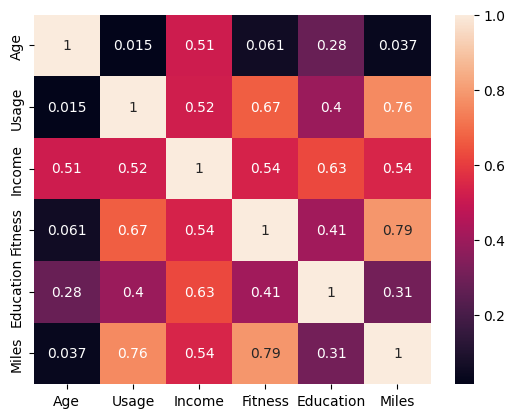

In [ ]:
sns.heatmap(df[['Age','Usage','Income','Fitness','Education','Miles']].corr(), annot = True)

Insights :           

1. Miles, Fitness, and Usage are strongly correlated (Miles–Fitness = 0.79, Usage–Miles = 0.76, Usage–Fitness = 0.67), indicating that more active and fitter customers use the treadmill more frequently and cover more distance.

2. Income shows moderate positive correlations with Education (0.63), Fitness (0.54), Usage (0.52), and Miles (0.54), suggesting higher-income customers tend to be more educated, fitter, and more active.

3. Age has weak correlations with all variables, meaning age does not strongly influence activity level, income, or treadmill usage patterns in this customer base.

What is the age profile of customers for this product

In [ ]:
bin = [0,10,20,30,40,50]
CI = ["0-10","10-20","20-30","30-40","40-50"]

df['age_group'] = pd.cut(df['Age'],bins = bin, labels = CI, right = False)
df.groupby('Product')['age_group'].value_counts()

/tmp/ipython-input-1908475464.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Product')['age_group'].value_counts()


Product  age_group
KP281    20-30        49
         30-40        20
         40-50         6
         10-20         4
         0-10          0
KP481    20-30        32
         30-40        22
         40-50         5
         10-20         1
         0-10          0
KP781    20-30        27
         30-40         8
         40-50         5
         0-10          0
         10-20         0
Name: count, dtype: int64

In [ ]:
products = df['Product'].unique()

for p in products:
    subset = df[df['Product'] == p]['Age']

    print(f"\nAge Profile for Product {p}")
    print("-----------------------------------")
    print("Mean Age:               ", round(subset.mean(), 2))
    print("Median Age:             ", round(subset.median(), 2))
    print("Minimum Age:            ", subset.min())
    print("Maximum Age:            ", subset.max())
    print("Most Common Age Group:  ", age_group.value_counts().idxmax())
    print("Age Variance:           ", round(subset.var(),2))
    print("Age Std Dev:            ", round(subset.std(),2))


Age Profile for Product KP281
-----------------------------------
Mean Age:                28.55
Median Age:              26.0
Minimum Age:             18
Maximum Age:             50
Most Common Age Group:   20-30
Age Variance:            52.15
Age Std Dev:             7.22

Age Profile for Product KP481
-----------------------------------
Mean Age:                28.9
Median Age:              26.0
Minimum Age:             19
Maximum Age:             48
Most Common Age Group:   20-30
Age Variance:            44.16
Age Std Dev:             6.65

Age Profile for Product KP781
-----------------------------------
Mean Age:                29.1
Median Age:              27.0
Minimum Age:             22
Maximum Age:             48
Most Common Age Group:   20-30
Age Variance:            48.61
Age Std Dev:             6.97


Insights :        

1. All three products attract mainly young adults (20–30 years), as this is the most common age group across KP281, KP481, and KP781.

2. KP781 buyers are slightly older on average (Mean = 29.1, Median = 27) compared to KP281 and KP481 buyers (Mean ≈ 28.6–28.9), indicating premium buyers tend to be slightly more mature.

3. Age variability is similar across models, with standard deviations around 6.5–7.2, showing that all products appeal to a wide but consistent age range, from early 20s to late 40s.

What is the gender split

In [ ]:
Gender_Split_Proportion = df.groupby('Product')['Gender'].value_counts(normalize = True) * 100
round(Gender_Split_Proportion,2)


/tmp/ipython-input-1376455317.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Gender_Split_Proportion = df.groupby('Product')['Gender'].value_counts(normalize = True) * 100


Product  Gender
KP281    Female    50.00
         Male      50.00
KP481    Male      51.67
         Female    48.33
KP781    Male      82.50
         Female    17.50
Name: proportion, dtype: float64

Insights :      

1. KP281 is perfectly gender-balanced (50% male, 50% female), indicating it appeals equally to both genders and is the most neutral product in the lineup.

2. KP481 shows only a slight male preference (≈52% male, 48% female), meaning both genders purchase the mid-range model at nearly the same rate.

3. KP781 has a very strong male skew (82.5% male, 17.5% female), making it the most gender-biased product and showing that premium treadmill buyers are predominantly male.

What is the income profile

In [ ]:
products = df['Product'].unique()

for p in products:
    subset = df[df['Product'] == p]['Income']

    print(f"\nIncome Profile for Product {p}")
    print("-----------------------------------")
    print("Mean Income:      ", round(subset.mean(), 2))
    print("Median Income:    ", round(subset.median(), 2))
    print("Minimum Income:   ", subset.min())
    print("Maximum Income:   ", subset.max())
    print("Income Variance:  ", round(subset.var(),2))
    print("Income Std Dev:   ", round(subset.std(),2))


Income Profile for Product KP281
-----------------------------------
Mean Income:       46418.02
Median Income:     46617.0
Minimum Income:    29562
Maximum Income:    68220
Income Variance:   82369840.51
Income Std Dev:    9075.78

Income Profile for Product KP481
-----------------------------------
Mean Income:       48973.65
Median Income:     49459.5
Minimum Income:    31836
Maximum Income:    67083
Income Variance:   74891532.33
Income Std Dev:    8653.99

Income Profile for Product KP781
-----------------------------------
Mean Income:       75441.58
Median Income:     76568.5
Minimum Income:    48556
Maximum Income:    104581
Income Variance:   342465992.71
Income Std Dev:    18505.84


Insights :           

1. KP281 and KP481 attract similar moderate-income customers, with mean incomes around 46k–49k, showing these two models appeal to the middle-income segment.

2. KP781 buyers earn significantly more, with a mean income of 75,442 and a median of 76,568, indicating that the premium model strongly appeals to high-income customers.

3. Income variability is much higher for KP781 (Std Dev ≈ 18,506) compared to KP281/KP481 (~8–9k), showing a wide spread of premium buyers but consistently at higher income levels.

What is the average usage per week

In [ ]:
products = df['Product'].unique()

for p in products:
    subset = df[df['Product'] == p]['Miles']

    print(f"\nAverage Weekly Usage for Product {p}")
    print("-------------------------------------------")
    print("Mean Miles per Week :", round(subset.mean(), 2))



Average Weekly Usage for Product KP281
-------------------------------------------
Mean Miles per Week : 82.79

Average Weekly Usage for Product KP481
-------------------------------------------
Mean Miles per Week : 87.93

Average Weekly Usage for Product KP781
-------------------------------------------
Mean Miles per Week : 166.9


Insights :        

1. KP781 users run the highest weekly miles (≈167 miles), showing that premium treadmill buyers are the most active and likely more serious or advanced runners.

2. KP281 and KP481 users have similar running volumes (≈83–88 miles/week), indicating that entry-level and mid-range customers have comparable activity levels.

3. The large jump in mileage for KP781 users suggests that weekly miles is a strong behavioral indicator for choosing the premium model.



What is their fitness rating?

In [ ]:
products = df['Product'].unique()

for p in products:
  subset = df[df['Product'] == p]['Fitness']

  print(f"\nFitness rating for Product {p}")
  print("-----------------------------------")
  print("Mean Fitness Rating:      ", round(subset.mean(), 2))
  print("Mediam Fitness Rating:    ", round(subset.median(), 2))
  print("Minimum Fitness Rating:   ", subset.min())
  print("Maximum Fitness Rating:   ", subset.max())
  print("Fitness Variance:         ", round(subset.var(),2))
  print("Fitness Std Dev:          ", round(subset.std(),2))



Fitness rating for Product KP281
-----------------------------------
Mean Fitness Rating:       2.96
Mediam Fitness Rating:     3.0
Minimum Fitness Rating:    1
Maximum Fitness Rating:    5
Fitness Variance:          0.44
Fitness Std Dev:           0.66

Fitness rating for Product KP481
-----------------------------------
Mean Fitness Rating:       2.9
Mediam Fitness Rating:     3.0
Minimum Fitness Rating:    1
Maximum Fitness Rating:    4
Fitness Variance:          0.4
Fitness Std Dev:           0.63

Fitness rating for Product KP781
-----------------------------------
Mean Fitness Rating:       4.62
Mediam Fitness Rating:     5.0
Minimum Fitness Rating:    3
Maximum Fitness Rating:    5
Fitness Variance:          0.45
Fitness Std Dev:           0.67


Insights :            

1. KP781 buyers have the highest fitness levels (mean 4.62, median 5), indicating that the premium model is chosen by advanced or highly fit users.

2. KP281 and KP481 buyers have similar moderate fitness levels (means around 2.9–2.96), showing these models appeal to beginners or intermediate users.

3. Fitness rating variance is low across all products, meaning customers within each product segment have consistent fitness levels, but the difference between products is large—clearly separating moderate vs. advanced users.

How many miles do they expect to run

In [ ]:
products = df['Product'].unique()

for p in products:
  subset = df[df['Product'] == p]['Miles']

  print(f"\nExpected Miles for Product {p}")
  print("-----------------------------------")
  print("Average Miles:          ", round(subset.mean(), 2))
  print("Mediam Miles:           ", round(subset.median(), 2))
  print("Minimum Miles:          ", subset.min())
  print("Maximum Miles:          ", subset.max())
  print("Miles Variance:         ", round(subset.var(),2))
  print("Miles Std Dev:          ", round(subset.std(),2))


Expected Miles for Product KP281
-----------------------------------
Average Miles:           82.79
Mediam Miles:            85.0
Minimum Miles:           38
Maximum Miles:           188
Miles Variance:          833.71
Miles Std Dev:           28.87

Expected Miles for Product KP481
-----------------------------------
Average Miles:           87.93
Mediam Miles:            85.0
Minimum Miles:           21
Maximum Miles:           212
Miles Variance:          1106.44
Miles Std Dev:           33.26

Expected Miles for Product KP781
-----------------------------------
Average Miles:           166.9
Mediam Miles:            160.0
Minimum Miles:           80
Maximum Miles:           360
Miles Variance:          3607.99
Miles Std Dev:           60.07


Insights :                 

1. KP781 customers run significantly more miles (avg 167 miles/week), indicating that the premium model attracts highly active or advanced runners with much higher training volumes.

2. KP281 and KP481 users have comparable mileage (avg 83–88 miles/week), showing that entry-level and mid-range buyers have similar activity levels and usage behavior.

3. KP781 has the highest variability in miles (Std Dev 60.07), suggesting a wide range of high-performance runners—from consistent trainers to extremely heavy runners (up to 360 miles/week).



Are these customers beginners, intermediate, or advanced

In [ ]:
def fitness_level(rating):
  if rating in ([1,2]):
    return 'Beginner'
  elif rating in ([3,4]):
    return 'Intermediate'
  elif rating in ([5]):
    return 'Advanced'

In [ ]:
df['fitness_level'] = df['Fitness'].apply(fitness_level)
df.groupby('Product')['fitness_level'].value_counts().reset_index()

/tmp/ipython-input-3045323073.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Product')['fitness_level'].value_counts().reset_index()


,Product,fitness_level,count
0,KP281,Intermediate,63
1,KP281,Beginner,15
2,KP281,Advanced,2
3,KP481,Intermediate,47
4,KP481,Beginner,13
5,KP481,Advanced,0
6,KP781,Advanced,29
7,KP781,Intermediate,11
8,KP781,Beginner,0


Insights :         

1. KP281 and KP481 are dominated by Intermediate users (63 and 47 respectively), showing that these models mainly attract moderately fit customers, with very few beginners or advanced users.

2. KP781 is the clear choice of Advanced users, with 29 advanced customers and zero beginners, confirming that the premium treadmill is preferred almost exclusively by highly fit individuals.

3. Beginner presence is very small overall, and completely absent in KP781, indicating that less-fit users prefer entry-level or mid-range models rather than premium equipment.



**Probability Analysis**

What is the marginal probability of purchasing each product

In [ ]:
marginal_prob = df['Product'].value_counts(normalize=True) * 100

print("Marginal Probability of Each Product")
print("------------------------------------")
print(round(marginal_prob,2))


Marginal Probability of Each Product
------------------------------------
Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: proportion, dtype: float64


Insights :             

1. KP281 has the highest marginal probability (44.44%), meaning nearly half of all customers purchase the entry-level model—it's the most popular product overall.

2. KP481 has a moderate marginal probability (33.33%), showing that one-third of customers choose the mid-range model, indicating solid but secondary demand.

3. KP781 has the lowest marginal probability (22.22%), confirming that the premium model appeals to a smaller, more specialized segment of the customer base.

What is the conditional probability: P(KP781 | Male)

In [ ]:
Male = df[df['Gender'] == 'Male']['Gender'].shape[0]
Product_KP781 = df[(df['Product'] == 'KP781') & (df['Gender'] == 'Male')].shape[0]
Prob1 = Product_KP781 / Male

print("Male Purchase Probability for KP781")
print("------------------------------------")
print(round(Prob1,2))

Male Purchase Probability for KP781
------------------------------------
0.32


Insights :          

1. A probability of 0.32 means 32% of all male customers purchase KP781, showing that the premium model has strong appeal among men.

2. Since KP781’s overall purchase probability is only 22.22%, the male probability (32%) is significantly higher, confirming a strong gender bias toward males for the premium product.

3. This elevated probability indicates that male customers are much more likely to upgrade to the premium treadmill, making them the primary target segment for KP781 marketing.

What is the conditional probability: P(KP481 | Age < 30)

In [ ]:
Age_30 = df[df['Age'] < 30].shape[0]
Product_KP481 = df[(df['Product'] == 'KP481') & (df['Age'] < 30)].shape[0]
Prob2 = Product_KP481 / Age_30

print("Probability of KP481 Purchase Among Customers Under 30")
print("------------------------------------")
print(round(Prob2,2))

Probability of KP481 Purchase Among Customers Under 30
------------------------------------
0.29


Insights :                

1. A probability of 0.29 means that 29% of all customers under age 30 purchase KP481, showing that the mid-range model has moderate popularity among younger customers.

2. Since KP481’s overall purchase probability is 33.33%, the slightly lower probability among under-30 customers (29%) suggests that younger buyers lean slightly more toward KP281 than KP481.

3. This indicates that KP481 appeals more to slightly older or mid-age customers, while the under-30 segment is more price-sensitive and prefers entry-level models.



What is the conditional probability: P(KP281 | Income < $50,000)



In [ ]:
Income_50000 = df[df['Income'] < 50000].shape[0]
Product_KP281 = df[(df['Product'] == 'KP281') & (df['Income'] < 50000)].shape[0]
Prob3 = Product_KP281 / Income_50000

print("Purchase Probability of KP281 Among Customers Earning < $50,000")
print("------------------------------------")
print(round(Prob3,2))

Purchase Probability of KP281 Among Customers Earning < $50,000
------------------------------------
0.58


Insights :        

1. A probability of 0.58 means 58% of lower-income customers choose KP281, making it the most preferred treadmill among budget-conscious buyers.

2. Since KP281’s overall probability is 44.44%, its popularity among <50k earners (58%) is much higher, showing strong price sensitivity in this segment.

3. This indicates that customers earning below $50,000 overwhelmingly prefer the entry-level model, making KP281 the ideal product for cost-focused marketing and promotions.

What is the conditional probability: P(KP781 | High Fitness)

In [ ]:
High_Fitness = df[df['fitness_level'] == "Advanced"].shape[0]
Product_KP781 = df[(df['Product'] == 'KP781') & (df['fitness_level'] == "Advanced")].shape[0]
Prob4 = Product_KP781 / High_Fitness

print("Purchase Probability of KP781 Among High-Fitness Customers")
print("------------------------------------")
print(round(Prob4,2))

Purchase Probability of KP781 Among High-Fitness Customers
------------------------------------
0.94


Insights :        

1. A probability of 0.94 means 94% of high-fitness customers choose KP781, showing an extremely strong preference for the premium treadmill among advanced users.

2. Since KP781’s overall purchase probability is only 22.22%, the massive jump to 94% in the high-fitness segment confirms that fitness level is the strongest predictor of choosing KP781.

3. This indicates that KP781 is almost exclusively favored by highly fit, high-performance customers, making them the primary target audience for premium marketing and advanced-feature promotions.

**Two-Way Contingency Tables**

How many males vs females bought each product

In [ ]:
male_female_bought_each_product = pd.crosstab(df['Gender'],df['Product'])
male_female_bought_each_product["Total"] = male_female_bought_each_product.sum(axis = 1)
male_female_bought_each_product

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104


Insights :

1. KP281 is equally preferred by both genders, making it the most neutral and broadly appealing product.

2. KP781 shows a strong male preference, with males choosing it nearly 5× more than females — the biggest gender difference.

3. Females prefer KP281 and KP481, while KP781 has very low female adoption, showing clear gender-based product segmentation.

Probability distribution of males vs females bought each product


In [ ]:
male_female_bought_each_product = pd.crosstab(df['Gender'],df['Product'], normalize = True)
round(male_female_bought_each_product,2)

Product,KP281,KP481,KP781
Gender,,,
Female,0.22,0.16,0.04
Male,0.22,0.17,0.18


Insights :     

1. KP781 shows the strongest gender difference — probability for males is 0.1833, while for females it is only 0.0389, indicating a clear male preference.

2. KP281 is gender-neutral, with an equal probability of 0.2222 for both males and females.

3. Females prefer KP481 more than KP781, with probabilities 0.1611 (KP481) vs 0.0389 (KP781), showing a stronger leaning toward mid-range products.

How does marital status differ across product types

In [ ]:
marital_status_product = pd.crosstab(df['MaritalStatus'],df['Product'])
marital_status_product["Total"] = marital_status_product.sum(axis = 1)
marital_status_product

Product,KP281,KP481,KP781,Total
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73


Insights :    

1. Partnered customers prefer all product types more than singles, with higher counts across KP281, KP481, and KP781.

2. KP281 is the most preferred product for both groups, but the gap is largest here — partnered customers choose it much more often than singles (48 vs 32).

3. The distribution across KP481 and KP781 is similar between groups, showing no strong marital-status bias for these products compared to KP281.

Probability distribution marital status differ across product types

In [ ]:
marital_status_product = pd.crosstab(df['MaritalStatus'],df['Product'], normalize = True)
round(marital_status_product,2)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.27,0.20,0.13
Single,0.18,0.13,0.09


Insights :

1. Partnered customers show consistently higher probabilities across all products — especially for KP281 (0.2667), indicating they are more likely overall to purchase any product than singles.

2. KP281 has the biggest marital-status gap, with partnered customers (0.2667) having a noticeably higher probability than singles (0.1778), showing stronger preference among partnered users.

3. KP781 shows the smallest difference across marital groups (0.1278 partnered vs. 0.0944 single), meaning this product is the least influenced by marital status.

**Overall Insights**

**1. Customer Profiles by Product Tier**

**KP281 – Entry-Level**

 Appeals equally to males and females (50–50 split).

 Primarily purchased by younger adults aged 20–30 (mean age ≈ 28.5).

Customers have lower incomes (~$46K) and intermediate fitness levels (avg rating 2.96).

Expected weekly miles are moderate (~83 miles).

Suited for beginners and intermediate fitness users with budget constraints.



**KP481 – Mid-Range Model**

Slight male skew (51.7% male, 48.3% female), but still balanced.

Similar age profile to KP281 (mean ≈ 28.9; dominant age group 20–30).

Moderate income group (~$49K).

Fitness levels and weekly usage are almost identical to KP281.

Appeals to customers looking for better features without paying for premium models.



**KP781 – Premium Model**

Strong male dominance (82.5% male).

Slightly older but still mostly 20–30 age group (mean ≈ 29.1).

Customers have high incomes (~$75K).

Highest fitness levels (mean 4.62, Advanced users).

Highest expected weekly miles (~167 miles), twice that of other models.

Chosen primarily by serious runners, advanced users, and high-income customers.



**2. Key Behavioral & Demographic Trends**

Age: All models are popular among the 20–30 age group; minor age differences across tiers.

Income: Strong upward trend—higher-income customers consistently pick higher-end models.

Fitness & Usage: Strongest predictors of product choice; KP781 customers are highly fit and heavy users.

Gender: KP281 and KP481 are gender-neutral; KP781 is strongly favored by males.

Marital Status: Partnered customers purchase more across all models.



**3. Most Influential Drivers of Product Choice**

Fitness Level – Advanced fitness users overwhelmingly choose KP781 (94% probability).

Expected Miles / Usage – High weekly miles strongly correlate with premium model purchase.

Income – Higher income increases likelihood of choosing KP781.

Gender (for KP781) – Male customers are significantly more likely to purchase premium equipment.

**Recommendations**

**1. Marketing Recommendations by Product Tier**

**KP281 – Entry-Level Product**

Target Audience: Young adults (20s–30s), budget-conscious buyers, beginners/intermediates.

Messaging: Affordability, ease of use, durability, everyday fitness.

Channels: Social media ads, youth-focused platforms, entry-level fitness communities.

Promotions: Intro discounts, EMI/financing, bundled basic fitness accessories.

**KP481 – Mid-Range Product**

Target Audience: Users wanting to upgrade from entry-level equipment; intermediate users.

Messaging: Value-for-money, improved features vs KP281, long-term durability.

Channels: Fitness blogs, online comparisons, gym partnerships.

Promotions: Upgrade offers, extended warranty bundles, coaching sessions.

**KP781 – Premium Product**

Target Audience: Advanced users, high-income customers, serious runners, predominantly male.

Messaging: Performance, durability, advanced tech, elite fitness experience.

Channels: High-end fitness magazines, athletic events, premium digital ads.

Promotions: Premium bundles (smartwatch, coaching, exclusive events), white-glove service.

**2. Product Positioning Recommendations**

KP281: Position as the “best affordable beginner treadmill.”

KP481: Market as the “ideal upgrade” with balanced performance and price.

KP781: Position as an “elite performance machine for advanced athletes.”

**3. Bundling Recommendations**

KP281: Basic fitness kit, workout guide, 30-day training app access.

KP481: Heart rate monitor, upgraded workout mat, extended warranty.

KP781: Smart wearables, personal training sessions, premium support membership.

4. Pricing Strategy Recommendations

KP281: Keep pricing competitive; use seasonal promotions to attract new customers.

KP481: Maintain mid-range pricing; emphasize feature upgrades.

KP781: Maintain premium pricing; justify value with advanced features and exclusive benefits.